# Example Conversion Efficiency

This example simulates a single electrolyzer stack with a linear ramping power signal. The electrolyzer is initialized as ON. The full structure for an electrolyzer model is defined in the source code, in `modeling_schema.yaml`.

* Conversion is calculated based on the energy consumed per kg of hydrogen. Units are kWh/kg

* Conversion efficiency is calculated by dividing the low-heating value of hydrogen (33.33 kWh/kg) by the actual conversion.

In [1]:
import numpy as np

from electrolyzer import run_electrolyzer
from electrolyzer.inputs.validation import load_modeling_yaml

import matplotlib.pyplot as plt
%matplotlib inline

## Load Electrolyzer configuration from YAML file

This .yaml file initializes a 500kW electrolyzer stack as `ON` with the `BaselineDeg` controller. 

In [7]:
fname_input_modeling = "./modeling_options.yaml"
model_input = load_modeling_yaml(fname_input_modeling)

rated_power = model_input['electrolyzer']['stack']['stack_rating_kW']

# Linear ramping power signal [W]
power_signal_input = np.linspace(1e5, 1.2e3 * rated_power, 200)

elec_sys, results_df = run_electrolyzer(model_input, power_signal_input)

results_df.tail()

,power_signal,curtailment,kg_rate,stack_1_deg,stack_1_fatigue,stack_1_cycles,stack_1_uptime,stack_1_kg_rate,stack_1_curr_density
195,589949.748744,0.089950,0.002031,6.041372e-08,0,0.0,196.0,0.002031,2.08729
196,592462.311558,0.092462,0.002031,6.074780e-08,0,0.0,197.0,0.002031,2.08729
197,594974.874372,0.094975,0.002031,6.108189e-08,0,0.0,198.0,0.002031,2.08729
198,597487.437186,0.097487,0.002031,6.141598e-08,0,0.0,199.0,0.002031,2.08729
199,600000.000000,0.100000,0.002031,6.175006e-08,0,0.0,200.0,0.002031,2.08729


### Power Signal
* Linear ramp power signal 
* Confirm that the stack is initialized at time = 0.0 seconds

<AxesSubplot:title={'center':'Stack Up time'}, xlabel='Time (s)', ylabel='Time (s)'>

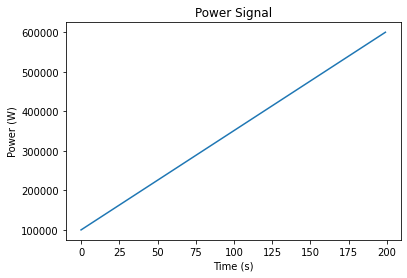

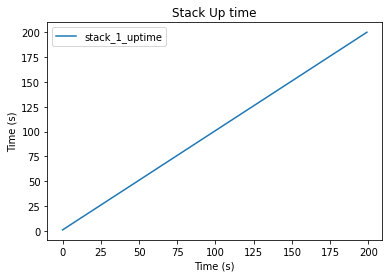

In [8]:
# Power input signal from DataFrame
results_df["power_signal"].plot(title="Power Signal", xlabel="Time (s)", ylabel="Power (W)")

# Plot stack up-time to show start up delays 
stack_uptime = results_df[[col for col in results_df.columns if "_uptime" in col]]
stack_uptime.plot(title="Stack Up time", xlabel="Time (s)", ylabel="Time (s)")

### Co-Plot H2 rate and Conversion Efficiency

* Converts DataFrame data to kW and kg/hr
* low-heating value (LHV) = 33.33 kWh/kg
* Rated power = 500kW 

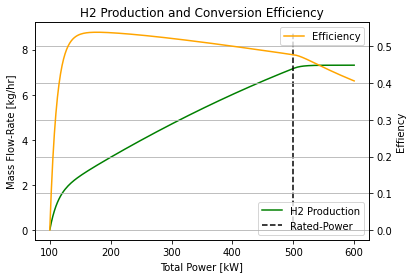

In [15]:
power_kW = results_df['power_signal'] / 1e3
h2rate_kg_hr = results_df['kg_rate'] * 3600 

lhv = 33.33 
eff_conv = lhv * h2rate_kg_hr / power_kW 

fig, ax = plt.subplots()
ax.set_title('H2 Production and Conversion Efficiency')
ax.plot(power_kW, h2rate_kg_hr, label='H2 Production', color='green')
ax.set_xlabel("Total Power [kW]")
ax.set_ylabel("Mass Flow-Rate [kg/hr]")
ax.vlines(x=rated_power, ymin=0, ymax=1.2*h2rate_kg_hr.max(), linestyle='dashed', color='black', label='Rated-Power')
plt.legend(loc='lower right')

ax2 = ax.twinx()
ax2.plot(power_kW, eff_conv, color='orange', label='Efficiency')
ax2.set_ylabel("Effiency")
plt.legend()
plt.grid()